<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Machine-Learning-Modeling" data-toc-modified-id="Machine-Learning-Modeling-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Machine Learning Modeling<a id="5_Machine_Learning_Modeling"></a></a></span><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Imports<a id="5.1_Imports"></a></a></span></li><li><span><a href="#Loading-the-Data" data-toc-modified-id="Loading-the-Data-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Loading the Data<a id="5.2_Loading_Data"></a></a></span></li><li><span><a href="#Target-Variable" data-toc-modified-id="Target-Variable-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Target Variable<a id="5.3_Target_Variable"></a></a></span></li><li><span><a href="#Loading-Selected-Features" data-toc-modified-id="Loading-Selected-Features-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Loading Selected Features<a id="5.4_Loading_Selected_Features"></a></a></span></li><li><span><a href="#Loading-Predictor-Variables" data-toc-modified-id="Loading-Predictor-Variables-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Loading Predictor Variables<a id="5.5_Loading_Predictor_Variables"></a></a></span></li><li><span><a href="#Machine-Learning-Models" data-toc-modified-id="Machine-Learning-Models-5.6"><span class="toc-item-num">5.6&nbsp;&nbsp;</span>Machine Learning Models<a id="5.6_Machine_Learning_Models"></a></a></span><ul class="toc-item"><li><span><a href="#Model-Performance-" data-toc-modified-id="Model-Performance--5.6.1"><span class="toc-item-num">5.6.1&nbsp;&nbsp;</span>Model Performance <a id="5.6.1_Model_Performance"></a></a></span></li><li><span><a href="#Hyper-Parameter-Tuning-" data-toc-modified-id="Hyper-Parameter-Tuning--5.6.2"><span class="toc-item-num">5.6.2&nbsp;&nbsp;</span>Hyper Parameter Tuning <a id="5.6.2_Model_Hyperparameter_Tuning"></a></a></span></li><li><span><a href="#XGBoost-Model-" data-toc-modified-id="XGBoost-Model--5.6.3"><span class="toc-item-num">5.6.3&nbsp;&nbsp;</span>XGBoost Model <a id="5.6.3_XGBoost_Model"></a></a></span></li><li><span><a href="#Random-Forest-Model-" data-toc-modified-id="Random-Forest-Model--5.6.4"><span class="toc-item-num">5.6.4&nbsp;&nbsp;</span>Random Forest Model <a id="5.6.4_Random_Forest_Model"></a></a></span></li><li><span><a href="#Regularized-Linear-Regression---Lasso-Model-" data-toc-modified-id="Regularized-Linear-Regression---Lasso-Model--5.6.5"><span class="toc-item-num">5.6.5&nbsp;&nbsp;</span>Regularized Linear Regression - Lasso Model <a id="5.6.5_Lasso_Model"></a></a></span></li><li><span><a href="#Feature-Importance-For-Lasso-Model-" data-toc-modified-id="Feature-Importance-For-Lasso-Model--5.6.6"><span class="toc-item-num">5.6.6&nbsp;&nbsp;</span>Feature Importance For Lasso Model <a id="5.6.6_Feature_Importance"></a></a></span></li></ul></li><li><span><a href="#Summary-of-Machine-Learning-Steps" data-toc-modified-id="Summary-of-Machine-Learning-Steps-5.7"><span class="toc-item-num">5.7&nbsp;&nbsp;</span>Summary of Machine Learning Steps<a id="5.7_ML_Summary"></a></a></span></li></ul></li></ul></div>

# Machine Learning Modeling<a id='5_Machine_Learning_Modeling'></a>

During the machine learning phase, following steps will be done:

- **Loading of data** - Data from the previous Pre-Processing phase will be loaded for this notebook.
- **Target variable** - Target variable will be defined as y_train and y_test
- **Loading of Selected Features** - Selected features list done during the Pre-Processing phase will be imported for use prior running the machine learning models.
- **Model Performance** - Machine learning model performance function will be defined.
- **Hyper Paramter Tuning** - Hyper paramters tuning step will be completed for the XGBoost model.
- **Machine Learning models** - XGBoost, Random Forest and Lasso models will be developed.

This phase is focused on the machine learning steps to find out the predicted house prices for the testing dataset as shown below:

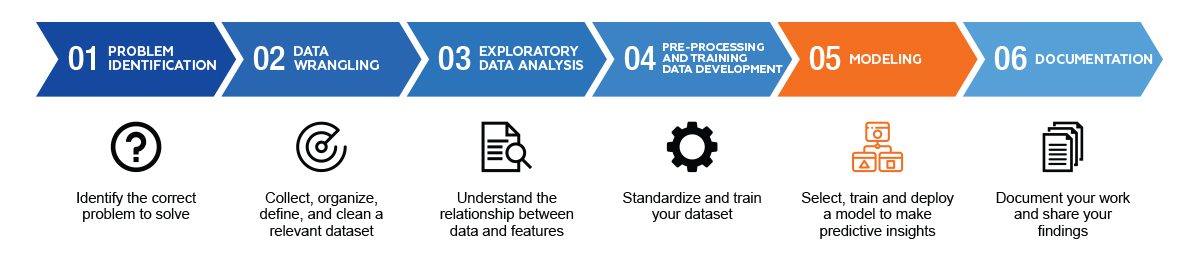

For the previous steps shown as above, please click at the below links to access those notebooks:

   1. For **Problem Identification Notebook** - [click here](https://github.com/jayguptacal/RetailAndMarketing/blob/main/HouseSalesPricePrediction/1_Problem_Identification_House_Prices.ipynb)
   2. For **Data Wrangling Notebook**, [click here](https://github.com/jayguptacal/RetailAndMarketing/blob/main/HouseSalesPricePrediction/2_Data_Wrangling_House_Prices.ipynb)
   3. For **Exploratory Data Analysis Notebook**, [click here](https://github.com/jayguptacal/RetailAndMarketing/blob/main/HouseSalesPricePrediction/3_EDA_House_Prices.ipynb)
   4. For **Pre-Processing and Training Data Development Notebook**, [click here](https://github.com/jayguptacal/RetailAndMarketing/blob/main/HouseSalesPricePrediction/4_Preprocessing_TrainingData_HousePrices.ipynb)

## Imports<a id='5.1_Imports'></a>

In [1]:
# Importing required packages and libraries for the machine learning steps
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

# Import required machine learning algorithms
from sklearn.linear_model import Lasso
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

# Import for the model performance evaluation
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from math import sqrt



# Visualise all the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

import warnings
warnings.simplefilter(action='ignore')

## Loading the Data<a id='5.2_Loading_Data'></a>

In [2]:
# Loading the data from the previous step for the X_train and X_test
X_train = pd.read_csv('../HousePricesPrediction/data/xtrain.csv')
X_test = pd.read_csv('../HousePricesPrediction/data/xtest.csv')

# Printing the data
X_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_na,MasVnrArea_na,GarageYrBlt_na
0,6.836259,0.000000,0.75,0.461171,0.377048,1.0,1.0,0.333333,1.000000,1.0,0.0,0.0,0.863636,0.4,1.0,0.75,0.6,0.903090,0.732487,0.014706,0.049180,0.0,0.0,1.0,1.0,0.000000,0.00000,0.666667,1.0,1.0,0.75,0.75,0.75,1.000000,0.002835,0.666667,0.0,0.673479,0.239935,1.0,1.00,1.0,1.0,0.559760,0.0,0.0,0.523250,0.000000,0.0,0.666667,0.0,0.375,0.333333,0.666667,0.643793,1.0,0.000000,0.2,0.8,0.018692,1.000000,0.75,0.430183,0.666667,1.0,1.0,0.116686,0.032907,0.0,0.000000,0.0,0.0,0.0,0.75,1.0,0.0,0.783092,0.750187,0.666667,0.75,12.211060,0.0,0.0,0.0
1,6.487684,0.000000,0.75,0.456066,0.399443,1.0,1.0,0.333333,0.333333,1.0,0.0,0.0,0.363636,0.4,1.0,0.75,0.6,0.698970,0.885622,0.360294,0.049180,0.0,0.0,0.6,0.6,0.666667,0.03375,0.666667,1.0,0.5,0.50,0.75,0.25,0.666667,0.142807,0.666667,0.0,0.114724,0.172340,1.0,1.00,1.0,1.0,0.434539,0.0,0.0,0.406196,0.333333,0.0,0.333333,0.5,0.375,0.333333,0.666667,0.470880,1.0,0.000000,0.2,0.8,0.457944,0.666667,0.25,0.220028,0.666667,1.0,1.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.50,1.0,0.0,0.836829,0.500249,0.666667,0.75,11.887931,0.0,0.0,0.0
2,3.828641,0.795881,0.75,0.394699,0.347082,1.0,1.0,0.000000,0.333333,1.0,0.0,0.0,0.954545,0.4,1.0,1.00,0.6,0.954243,0.732487,0.036765,0.098361,1.0,0.0,0.3,0.2,0.666667,0.25750,1.000000,1.0,1.0,1.00,0.75,0.25,1.000000,0.080794,0.666667,0.0,0.601951,0.286743,1.0,1.00,1.0,1.0,0.627205,0.0,0.0,0.586296,0.333333,0.0,0.666667,0.0,0.250,0.333333,1.000000,0.564575,1.0,0.333333,0.8,0.8,0.046729,0.666667,0.50,0.406206,0.666667,1.0,1.0,0.228705,0.149909,0.0,0.000000,0.0,0.0,0.0,0.75,1.0,0.0,0.278943,1.000000,0.666667,0.75,12.675764,0.0,0.0,0.0
3,7.207119,0.000000,0.75,0.388581,0.493677,1.0,1.0,0.666667,0.666667,1.0,0.0,0.0,0.454545,0.4,1.0,0.75,0.6,0.845098,0.732487,0.066176,0.163934,0.0,0.0,1.0,1.0,0.000000,0.00000,0.666667,1.0,1.0,0.75,0.75,1.00,1.000000,0.255670,0.666667,0.0,0.018114,0.242553,1.0,1.00,1.0,1.0,0.566920,0.0,0.0,0.529943,0.333333,0.0,0.666667,0.0,0.375,0.333333,0.666667,0.470880,1.0,0.333333,0.4,0.8,0.084112,0.666667,0.50,0.362482,0.666667,1.0,1.0,0.469078,0.045704,0.0,0.000000,0.0,0.0,0.0,0.75,1.0,0.0,0.836829,0.250187,0.666667,0.75,12.278393,1.0,0.0,0.0
4,4.025352,0.000000,0.75,0.577658,0.402702,1.0,1.0,0.333333,0.333333,1.0,0.0,0.0,0.363636,0.4,1.0,0.75,0.6,0.778151,0.732487,0.323529,0.737705,0.0,0.0,0.6,0.7,0.666667,0.17000,0.333333,1.0,0.5,0.50,0.75,0.25,0.333333,0.086818,0.666667,0.0,0.434278,0.233224,1.0,0.75,1.0,1.0,0.549026,0.0,0.0,0.513216,0.000000,0.0,0.666667,0.0,0.375,0.333333,0.333333,0.643793,1.0,0.333333,0.8,0.8,0.411215,0.666667,0.50,0.406206,0.666667,1.0,1.0,0.000000,0.000000,0.0,0.801181,0.0,0.0,0.0,0.75,1.0,0.0,0.783092,0.500249,0.666667,0.75,12.103486,0.0,0.0,0.0


## Target Variable<a id='5.3_Target_Variable'></a>

In [3]:
# Predicting house sale prices is the target variable and capturing again for y_train and y_test
y_train = X_train['SalePrice']
y_test = X_test['SalePrice']

## Loading Selected Features<a id='5.4_Loading_Selected_Features'></a>

In [4]:
# During Pre-Processing phase, a list of features were selected and uploading those here
features = pd.read_csv('../HousePricesPrediction/data/selected_features.csv')
# Placing the selected features series into a list
features = features['0'].to_list()

In [5]:
# Printing the list of selected features
print("Selected features are: \n", features)

Selected features are: 
 ['MSSubClass', 'MSZoning', 'Neighborhood', 'OverallQual', 'YearRemodAdd', 'RoofStyle', 'MasVnrType', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'HeatingQC', 'CentralAir', '1stFlrSF', 'GrLivArea', 'BsmtFullBath', 'KitchenQual', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'PavedDrive']


## Loading Predictor Variables<a id='5.5_Loading_Predictor_Variables'></a>

In [6]:
# Filtering features for the X_train and X_test
X_train = X_train[features]
X_test = X_test[features]

# Checking for the new X_train
X_train.head()

,MSSubClass,MSZoning,Neighborhood,OverallQual,YearRemodAdd,RoofStyle,MasVnrType,ExterQual,BsmtQual,BsmtExposure,HeatingQC,CentralAir,1stFlrSF,GrLivArea,BsmtFullBath,KitchenQual,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,PavedDrive
0,0.000000,0.75,0.863636,0.903090,0.049180,0.0,0.000000,0.666667,0.75,0.75,1.00,1.0,0.559760,0.523250,0.000000,0.666667,0.000000,0.2,0.8,1.000000,0.75,1.0
1,0.000000,0.75,0.363636,0.698970,0.049180,0.0,0.666667,0.666667,0.50,0.25,1.00,1.0,0.434539,0.406196,0.333333,0.666667,0.000000,0.2,0.8,0.666667,0.25,1.0
2,0.795881,0.75,0.954545,0.954243,0.098361,1.0,0.666667,1.000000,1.00,0.25,1.00,1.0,0.627205,0.586296,0.333333,1.000000,0.333333,0.8,0.8,0.666667,0.50,1.0
3,0.000000,0.75,0.454545,0.845098,0.163934,0.0,0.000000,0.666667,0.75,1.00,1.00,1.0,0.566920,0.529943,0.333333,0.666667,0.333333,0.4,0.8,0.666667,0.50,1.0
4,0.000000,0.75,0.363636,0.778151,0.737705,0.0,0.666667,0.333333,0.50,0.25,0.75,1.0,0.549026,0.513216,0.000000,0.333333,0.333333,0.8,0.8,0.666667,0.50,1.0


## Machine Learning Models<a id='5.6_Machine_Learning_Models'></a>

### Model Performance <a id='5.6.1_Model_Performance'></a>

In [7]:
# Defining the model performance function for X_train
def model_result_train(clf, X_train, y_train):
    pred = clf.predict(X_train)
    print("Train MSE: {}".format(int(mean_squared_error(np.exp(y_train), np.exp(pred)))))
    print("Train RMSE: {}".format(int(sqrt(mean_squared_error(np.exp(y_train), np.exp(pred))))))
    print("Train r2_score: {}".format(r2_score(np.exp(y_train), np.exp(pred))))

In [8]:
# Defining the model performance function for X_test
def model_result_test(clf, X_test, y_test):
    pred = clf.predict(X_test)
    print("Test MSE: {}".format(int(mean_squared_error(np.exp(y_test), np.exp(pred)))))
    print("Test RMSE: {}".format(int(sqrt(mean_squared_error(np.exp(y_test), np.exp(pred))))))
    print("Test r2 score: {}".format(int(r2_score(np.exp(y_test), np.exp(pred)))))

### Hyper Parameter Tuning <a id='5.6.2_Model_Hyperparameter_Tuning'></a>

In [9]:
# defining a function for hyper parameter tuning steps
def hyper_tuning(X_train, y_train):
    param_tuning = {'learning_rate': [0.01, 0.1],
                    'max_depth': [3, 5, 7, 10],
                    'min_child_weight': [1, 3, 5],
                    'colsample_bytree': [0.5, 0.7],
                    'n_estimators': [50, 100, 200, 500],
                    'objective': ['reg:squarederror']                   
                   }
    xgb_model = XGBRegressor()
    xgb_search = GridSearchCV(estimator=xgb_model, param_grid=param_tuning, cv=3, n_jobs=-1, verbose=1)
    xgb_search.fit(X_train, y_train)
    return xgb_search.best_params_    

In [10]:
# Finding best parameters
best_params = hyper_tuning(X_train, y_train)

Fitting 3 folds for each of 192 candidates, totalling 576 fits


In [11]:
# Printing best parameters
print("Best parameters for the XGBoost are: \n", best_params)

Best parameters for the XGBoost are: 
 {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 200, 'objective': 'reg:squarederror'}


### XGBoost Model <a id='5.6.3_XGBoost_Model'></a>

In [12]:
# Training the XGBoost model with the best parameters
xgb_model = XGBRegressor(objective='reg:squarederror',
                         n_estimators=200,
                         colsample_bytree=0.7,
                         learning_rate=0.1,
                         max_depth=3,
                         min_child_weight=1)
# Fitting the model
xgb_model.fit(X_train, y_train)
# Predicting the values
pred = xgb_model.predict(X_train)

In [13]:
# Printing model results for X_train
model_result_train(xgb_model, X_train, y_train)

Train MSE: 253978325
Train RMSE: 15936
Train r2_score: 0.959323324163059


In [14]:
# Printing model results for X_test
model_result_test(xgb_model, X_test, y_test)

Test MSE: 796340093
Test RMSE: 28219
Test r2 score: 0


In [15]:
# Printing average house price
print("Mean average house price: ", int(np.exp(y_train).mean()))
print("Median average house price: ", int(np.exp(y_train).median()))

Mean average house price:  181040
Median average house price:  163000


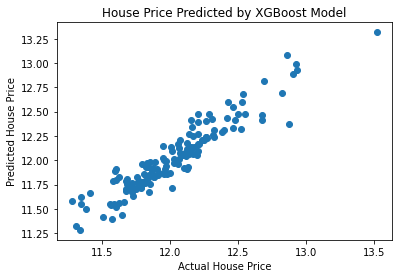

In [16]:
# Evaluating the XGBoost model for the real sale prices vs. the predicted prices
plt.scatter(y_test, xgb_model.predict(X_test))
plt.xlabel("Actual House Price")
plt.ylabel("Predicted House Price")
plt.title("House Price Predicted by XGBoost Model")
plt.show()

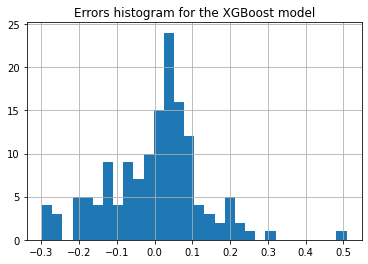

In [17]:
# Plotting the distribution of errors between y_test and predicted values
xgb_errors = y_test - xgb_model.predict(X_test)
xgb_errors.hist(bins=30)
plt.title("Errors histogram for the XGBoost model")
plt.show()

### Random Forest Model <a id='5.6.4_Random_Forest_Model'></a>

In [18]:
# Runing the Random Forest model
forest_model = RandomForestRegressor(n_estimators=100, max_depth=10)
forest_model.fit(X_train, y_train)
pred = forest_model.predict(X_test)

In [19]:
# Printing model results for X_train
model_result_train(forest_model, X_train, y_train)

Train MSE: 157366917
Train RMSE: 12544
Train r2_score: 0.9747964197202063


In [20]:
# Printing model results for X_test
model_result_test(forest_model, X_test, y_test)

Test MSE: 978807476
Test RMSE: 31285
Test r2 score: 0


In [21]:
# Printing average house price
print("Mean average house price: ", int(np.exp(y_train).mean()))
print("Median average house price: ", int(np.exp(y_train).median()))

Mean average house price:  181040
Median average house price:  163000


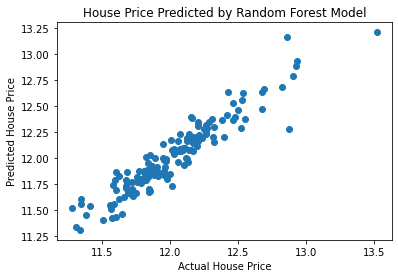

In [22]:
# Evaluating the Random Forest model for the real sale prices vs. the predicted prices
plt.scatter(y_test, forest_model.predict(X_test))
plt.xlabel("Actual House Price")
plt.ylabel("Predicted House Price")
plt.title("House Price Predicted by Random Forest Model")
plt.show()

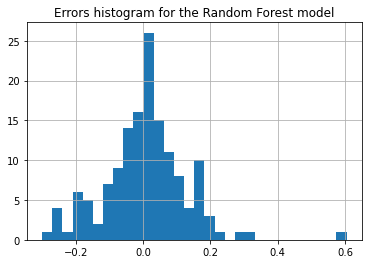

In [23]:
# Plotting the distribution of errors between y_test and predicted values
forest_errors = y_test - forest_model.predict(X_test)
forest_errors.hist(bins=30)
plt.title("Errors histogram for the Random Forest model")
plt.show()

### Regularized Linear Regression - Lasso Model <a id='5.6.5_Lasso_Model'></a>

In [24]:
# Regularized linear regression (Lasso)
lasso_model = Lasso(alpha=0.005, random_state=0)
lasso_model.fit(X_train, y_train)

Lasso(alpha=0.005, random_state=0)

In [25]:
# Printing model results for X_train
model_result_train(lasso_model, X_train, y_train)

Train MSE: 1146454214
Train RMSE: 33859
Train r2_score: 0.8163861172545972


In [26]:
# Printing model results for X_test
model_result_test(lasso_model, X_test, y_test)

Test MSE: 1542241100
Test RMSE: 39271
Test r2 score: 0


In [27]:
# Printing average house price
print("Mean average house price: ", int(np.exp(y_train).mean()))
print("Median average house price: ", int(np.exp(y_train).median()))

Mean average house price:  181040
Median average house price:  163000


Based on the MSE and RMSE values, Random Forest is the best model due to the lowest values. For the purpose of production model, I am going to use Lasso model as house prediction prices are same.

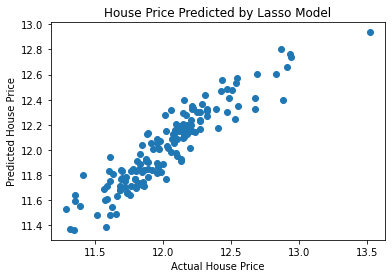

In [28]:
# Evaluating the Lasso model for the real sale prices vs. the predicted prices
plt.scatter(y_test, lasso_model.predict(X_test))
plt.xlabel("Actual House Price")
plt.ylabel("Predicted House Price")
plt.title("House Price Predicted by Lasso Model")
plt.show()

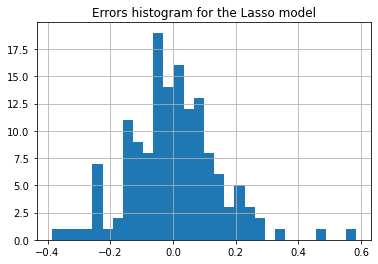

In [29]:
# Plotting the distribution of errors between y_test and predicted values
lasso_errors = y_test - lasso_model.predict(X_test)
lasso_errors.hist(bins=30)
plt.title("Errors histogram for the Lasso model")
plt.show()

### Feature Importance For Lasso Model <a id='5.6.6_Feature_Importance'></a>

As I am going to use the Lasso model for the production purpose, I am going to check the feature importance for the lasso model.

Text(0.5, 1.0, 'Feature Importance for House Price Prediction Model')

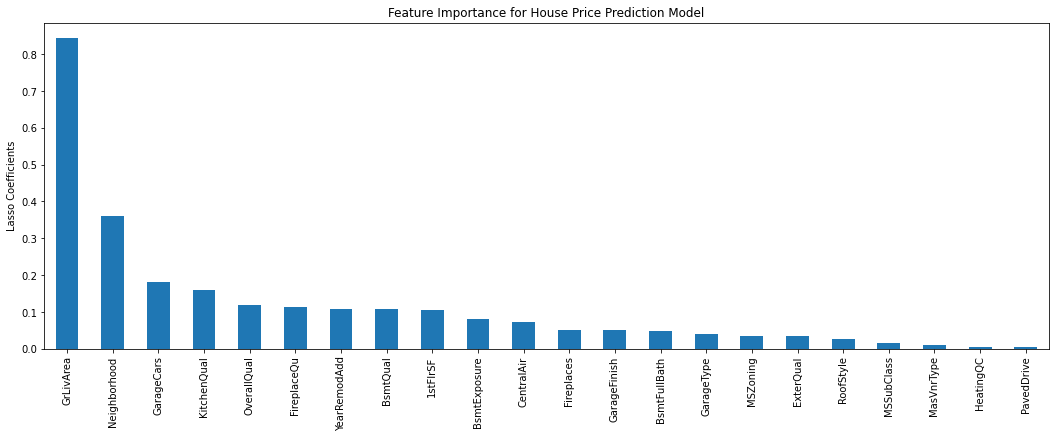

In [30]:
# Finding feature importance for the Lasso model
importance = pd.Series(np.abs(lasso_model.coef_.ravel()))
importance.index = features
importance.sort_values(inplace=True, ascending=False)
importance.plot.bar(figsize=(18,6))
plt.ylabel('Lasso Coefficients')
plt.title('Feature Importance for House Price Prediction Model')

I will keep the above features in mind while designing the user interface for the production version of this model.

In [31]:
# Saving the train and test datasets for the next phase

X_train.to_csv('../HousePricesPrediction/data/xtrain_prod.csv', index=False)
X_test.to_csv('../HousePricesPrediction/data/xtest_prod.csv', index=False)

## Summary of Machine Learning Steps<a id='5.7_ML_Summary'></a>

Here is the summary of the machine learning steps taken during this phase:

- **Loading of data** - Data from the previous Pre-Processing phase was loaded for this notebook.
- **Target variable** - Target variable was defined as y_train and y_test
- **Loading of Selected Features** - A list of selected features important for the purpose of house price prediction was developed and saved during the Pre-Processing phase which was imported for use prior running the machine learning models.
- **Model Performance** - Machine learning model performance function was defined.
- **Hyper Paramter Tuning** - Hyper paramters tuning step was completed for the XGBoost model.
- **XGBoost model** - MSE (mean squared error) value is 253,978,325, RMSE(root mean squared error) value is 15,936 and r2_score is 0.959323324163059 for the training dataset.
- **Random Forest model** - MSE (mean squared error) value is 163,109,613, RMSE(root mean squared error) value is 12,771 and r2_score is 0.9738766807691469 for the training dataset.
- **Lasso model** - MSE (mean squared error) value is 1146,454,214, RMSE(root mean squared error) value is 33,859 and r2_score is 0.8163861172545972 for the training dataset.

Another notebook has been added for the final steps to be listed on one notebook for the production code purpose.

For all the previous notebooks and the next notebook on the full machine learning code at one place for the production purpose, please click at the below links:

   1. For **Problem Identification Notebook** - [click here](https://github.com/jayguptacal/RetailAndMarketing/blob/main/HouseSalesPricePrediction/1_Problem_Identification_House_Prices.ipynb)
   2. For **Data Wrangling Notebook**, [click here](https://github.com/jayguptacal/RetailAndMarketing/blob/main/HouseSalesPricePrediction/2_Data_Wrangling_House_Prices.ipynb)
   3. For **Exploratory Data Analysis Notebook**, [click here](https://github.com/jayguptacal/RetailAndMarketing/blob/main/HouseSalesPricePrediction/3_EDA_House_Prices.ipynb)
   4. For **Pre-Processing and Training Data Development Notebook**, [click here](https://github.com/jayguptacal/RetailAndMarketing/blob/main/HouseSalesPricePrediction/4_Preprocessing_TrainingData_HousePrices.ipynb)
   5. For **Machine Learning Notebook**, [click here](https://github.com/jayguptacal/RetailAndMarketing/blob/main/HouseSalesPricePrediction/5_Machine_Learning_House_Prices.ipynb)
   6. For **Full ML Model for Production Purpose**, [click here](https://github.com/jayguptacal/RetailAndMarketing/blob/main/HouseSalesPricePrediction/6a_FullMLPipeline_ProductionPurpose.ipynb)